In [355]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.io
import math
import os
%matplotlib inline

In [158]:
simulation_names = ['linear', 'exponential', 'cubic', 'joint_normal', 'step',
                    'quadratic', 'w_shape', 'spiral', 'bernoulli', 'log',
                    'fourth_root', 'sine_4pi', 'sine_16pi', 'square', 'two_parabolas',
                    'circle', 'ellipse', 'diamond', 'multi_noise', 'multi_indept']

In [680]:
def get_data(simulation_type):
    file_name_prefix = './sample_data_viz/type_{}'.format(simulation_type)

    matrix_X = scipy.io.loadmat(file_name_prefix + '_X.mat')['x_mtx']
    matrix_Y = scipy.io.loadmat(file_name_prefix + '_Y.mat')['y_mtx']
    
    return matrix_X, matrix_Y

In [681]:
def rotate_by_theta(x, y, theta):
    # rotation transform matrix
    c, s = np.cos(math.radians(theta)), np.sin(math.radians(theta))
    rotation_matrix = np.array([[c, s], [-s, c]])

    # apply two sample transform
    data_matrix = np.concatenate([x, y], axis=1)
    rotated_data_matrix = np.dot(rotation_matrix, data_matrix.T).T
    x_rotated, y_rotated = np.hsplit(rotated_data_matrix, 2)
    
    return x_rotated, y_rotated

In [571]:
def plot_all_simulations():
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(2*11.7+2, 2*8.27+2))
    for simulation_type in range(1, 20):
        row = (simulation_type-1) // 5
        col = (simulation_type-1) % 5

        x, y = get_data(simulation_type)
        x_rotated, y_rotated = rotate_by_theta(x, y, 60)

        ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], ax=axs[row][col])
        ax_sub.set_title(simulation_names[simulation_type-1], fontweight='bold', fontsize='x-large')

    # plot last sim outside, to get only one legend
    ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], label='Normal', ax=axs[3][4])
    ax_sub = sns.scatterplot(x=x_rotated[:,0], y=y_rotated[:,0], label='Rotated', ax=axs[3][4])
    ax_sub.set_title(simulation_names[19], fontweight='bold', fontsize='x-large')

    fig.text(0.5, 0.09, 'X Vector', ha='center', fontsize=20)
    fig.text(0.09, 0.5, 'Y Vector', va='center', rotation='vertical', fontsize=20)

    plt.legend(bbox_to_anchor=(0.98, 0.515), bbox_transform=plt.gcf().transFigure, fontsize='x-large', markerscale=2)
    plt.show()

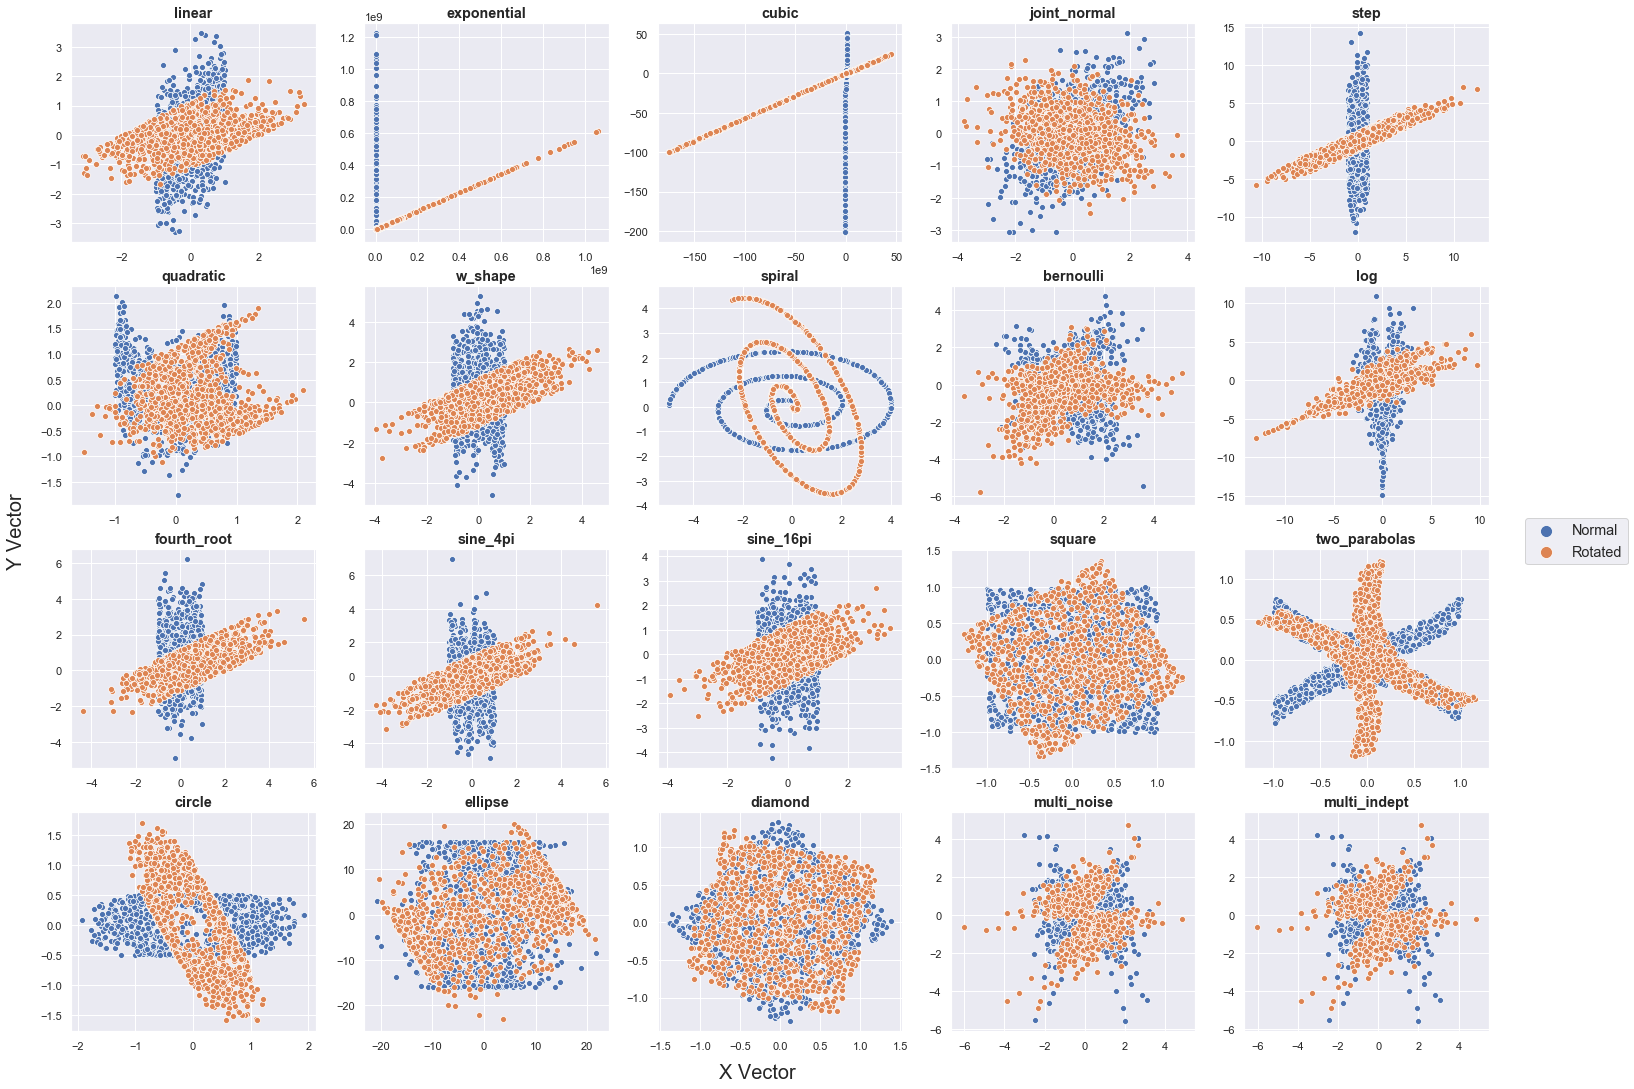

In [572]:
plot_all_simulations()

In [682]:
def plot_simulation(simulation_type):
    x, y = get_data(simulation_type)
    x_rotated, y_rotated = rotate_by_theta(x, y, 60)

    fig, axs = plt.subplots(ncols=2, figsize=(11.5, 5))

    p1 = axs[0].scatter(x, y, c='b')
    p2 = axs[1].scatter(x_rotated, y_rotated, c='r')

    fig.suptitle(simulation_names[simulation_type-1], fontweight='bold', fontsize='large')
    fig.text(0.5, 0.02, 'X Vector', ha='center', fontsize='large')
    fig.text(0.07, 0.5, 'Y Vector', va='center', rotation='vertical', fontsize='large')

    fig.legend([p1, p2], ["Normal", "Rotated"], bbox_to_anchor=(1.05, 0.55), bbox_transform=plt.gcf().transFigure)

    plt.show()

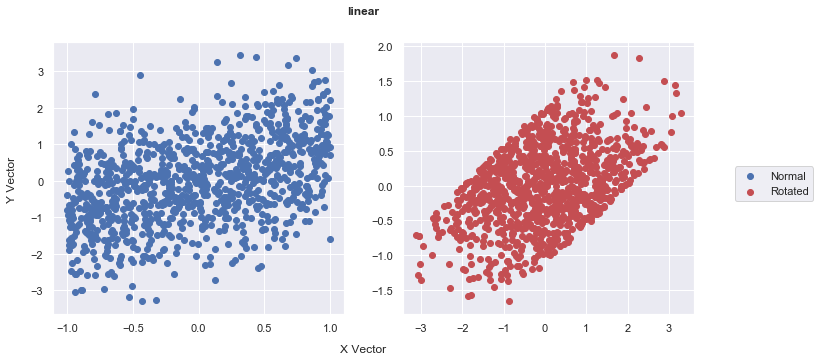

In [683]:
plot_simulation(1)

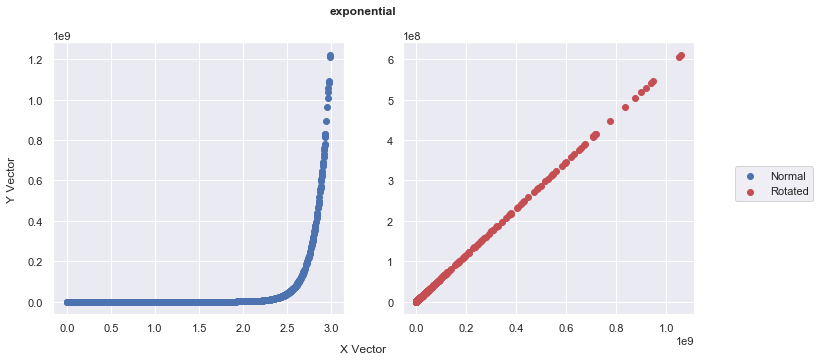

In [658]:
plot_simulation(2)

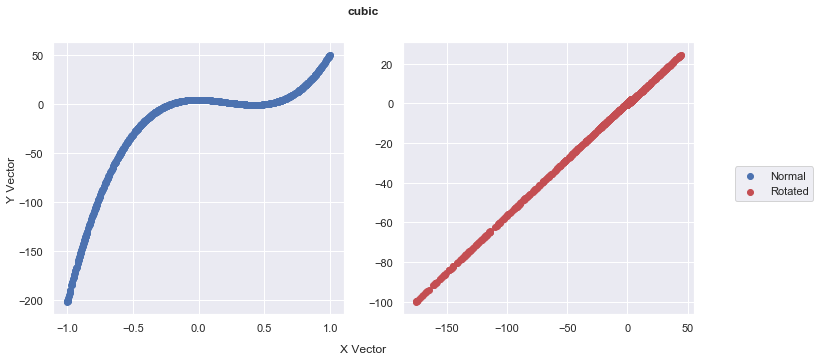

In [659]:
plot_simulation(3)

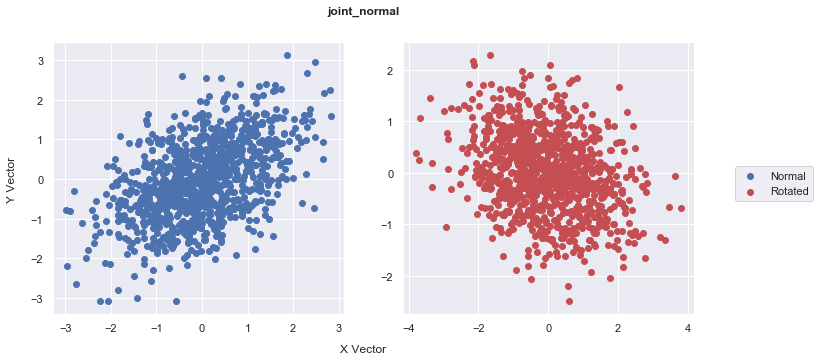

In [660]:
plot_simulation(4)

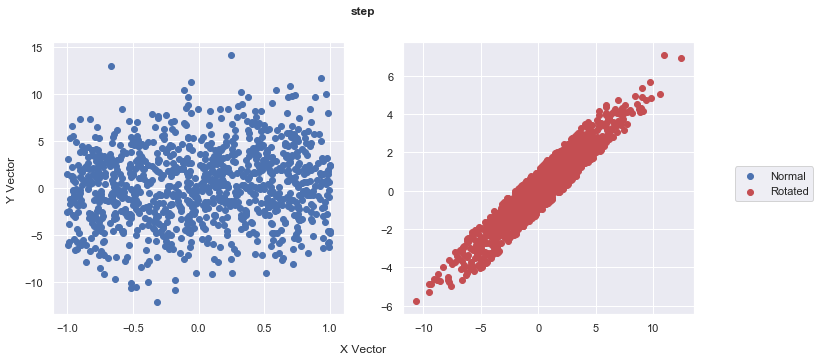

In [661]:
plot_simulation(5)

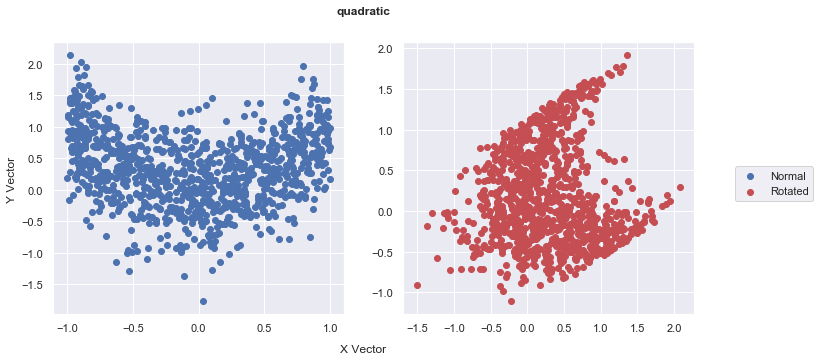

In [662]:
plot_simulation(6)

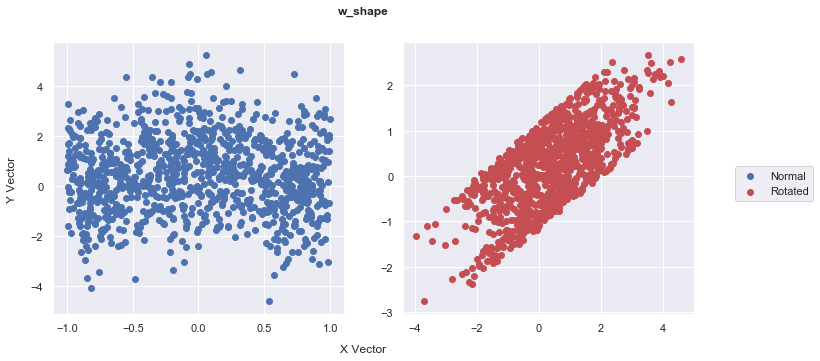

In [663]:
plot_simulation(7)

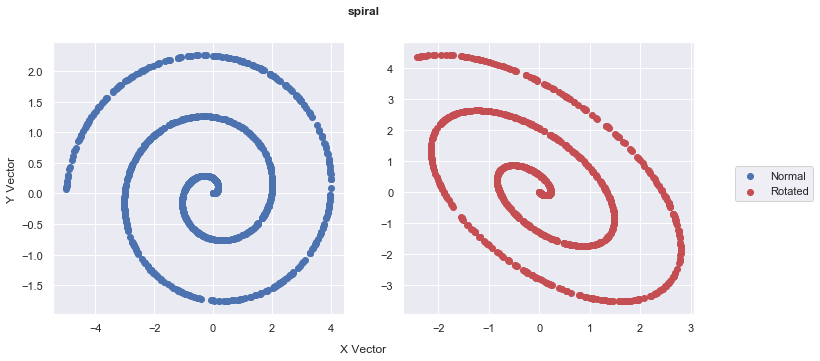

In [664]:
plot_simulation(8)

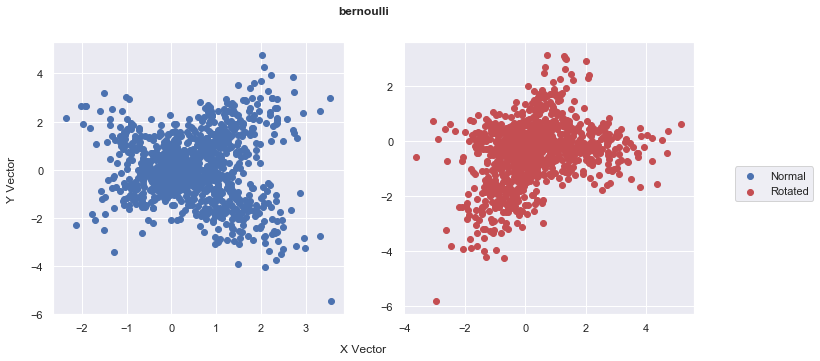

In [665]:
plot_simulation(9)

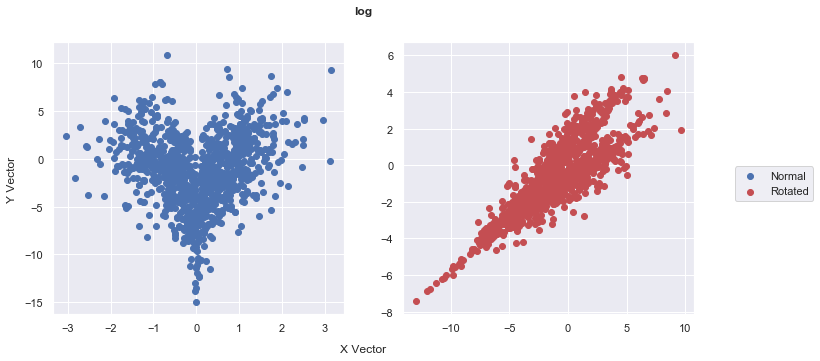

In [666]:
plot_simulation(10)

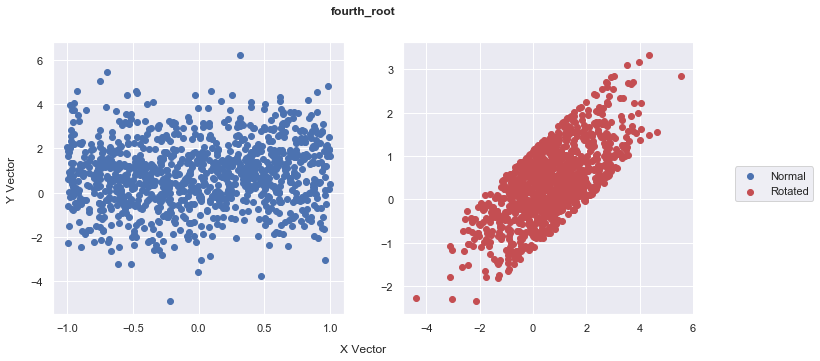

In [667]:
plot_simulation(11)

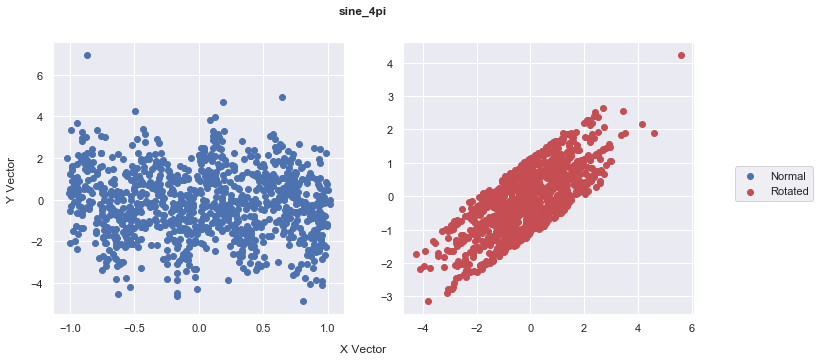

In [668]:
plot_simulation(12)

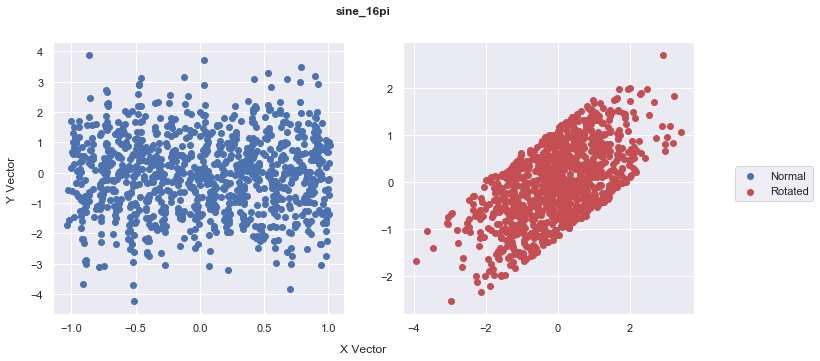

In [669]:
plot_simulation(13)

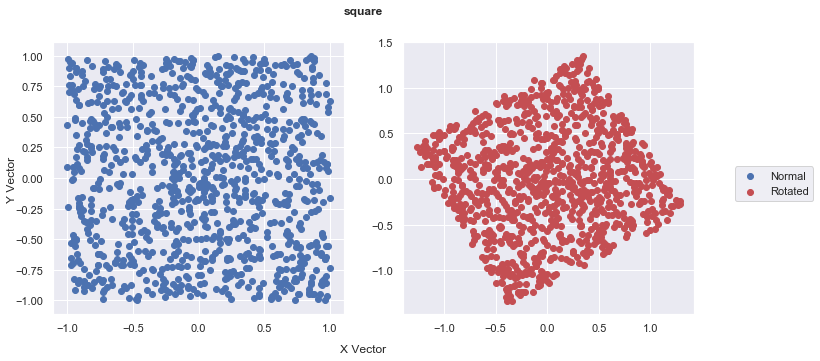

In [670]:
plot_simulation(14)

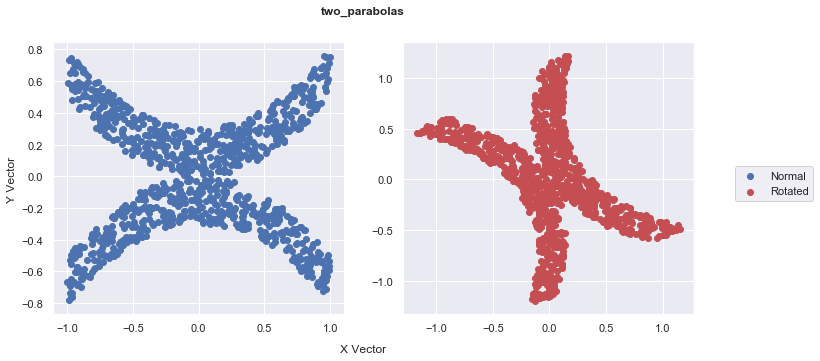

In [671]:
plot_simulation(15)

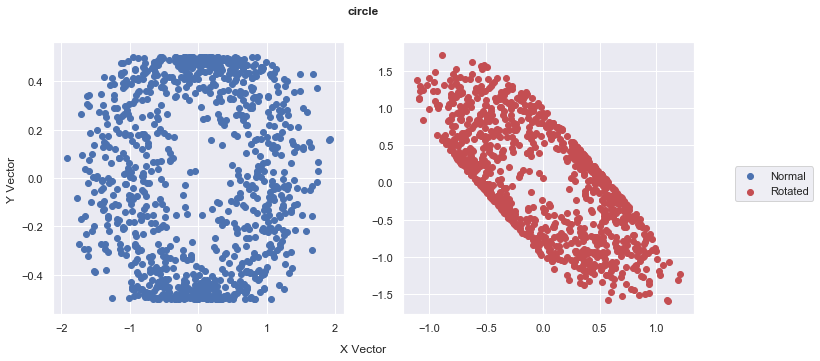

In [672]:
plot_simulation(16)

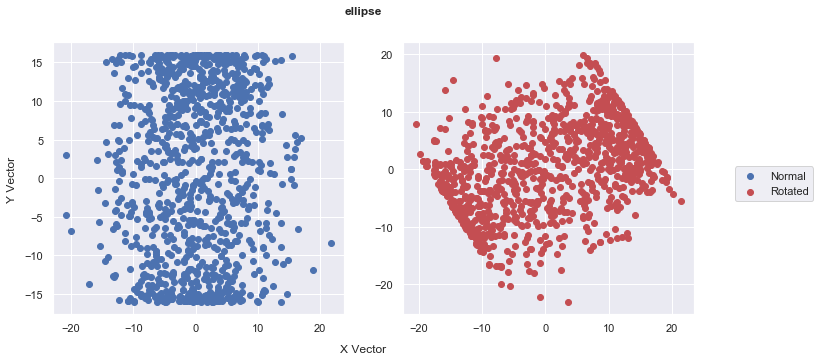

In [673]:
plot_simulation(17)

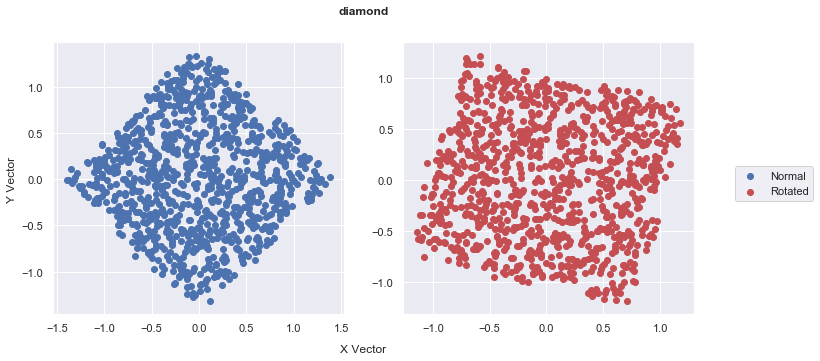

In [674]:
plot_simulation(18)

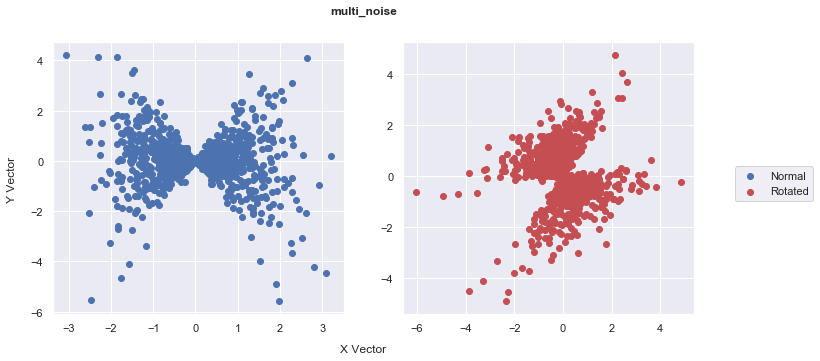

In [675]:
plot_simulation(19)

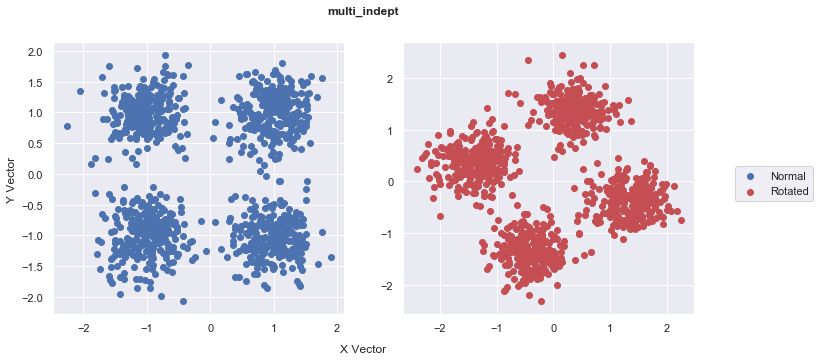

In [676]:
plot_simulation(20)

In [677]:
# plot means of the 3 sample 2-d gaussians

In [678]:
def get_equidistant_means(epsilon):
    return [0, (np.sqrt(3)/3)*epsilon], [-epsilon/2, -(np.sqrt(3)/6)*epsilon], [epsilon/2, -(np.sqrt(3)/6)*epsilon], [0, (np.sqrt(3)/3)*epsilon]

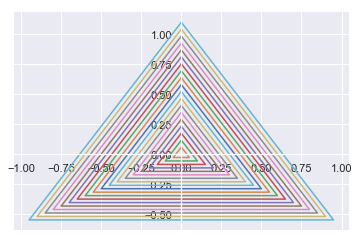

In [679]:
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.set_aspect("equal")

for i in np.arange(0, 2, 0.1):
    ax.plot(*list(zip(*get_equidistant_means(i))))